# Student_ID: 2487190G

# AIC and BIC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import mixture
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import itertools
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from scipy import linalg

%matplotlib inline

In [2]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
print(labels.shape)
print(digits.data.shape)
print(data.shape)
print(labels[0:20])

(1797,)
(1797, 64)
(1797, 64)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [3]:
reduced_data = PCA(n_components=2).fit_transform(data)

### Visualizing the Projection on 2 PCs:

1797


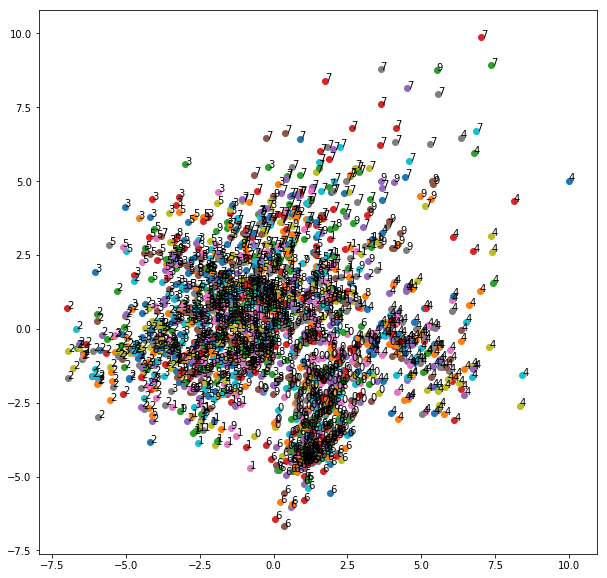

In [4]:
fig = plt.figure(figsize=(10,10)) # do not change the name of fig_d3 !!!
ax = fig.add_subplot(1,1,1)
count=0
for i in range(labels.shape[0]):
    count+=1
    if labels[i]==0:
        plt.scatter(reduced_data[i,0],reduced_data[i,1])
        plt.text(reduced_data[i,0],reduced_data[i,1],'0')
    elif labels[i]==1:
        plt.scatter(reduced_data[i,0],reduced_data[i,1])
        plt.text(reduced_data[i,0],reduced_data[i,1],'1')
    elif labels[i]==2:
        plt.scatter(reduced_data[i,0],reduced_data[i,1])
        plt.text(reduced_data[i,0],reduced_data[i,1],'2')
    elif labels[i]==3:
        plt.scatter(reduced_data[i,0],reduced_data[i,1])
        plt.text(reduced_data[i,0],reduced_data[i,1],'3')
    elif labels[i]==4:
        plt.scatter(reduced_data[i,0],reduced_data[i,1])
        plt.text(reduced_data[i,0],reduced_data[i,1],'4')
    elif labels[i]==5:
        plt.scatter(reduced_data[i,0],reduced_data[i,1])
        plt.text(reduced_data[i,0],reduced_data[i,1],'5')
    elif labels[i]==6:
        plt.scatter(reduced_data[i,0],reduced_data[i,1])
        plt.text(reduced_data[i,0],reduced_data[i,1],'6')
    elif labels[i]==7:
        plt.scatter(reduced_data[i,0],reduced_data[i,1])
        plt.text(reduced_data[i,0],reduced_data[i,1],'7')
    elif labels[i]==8:
        plt.scatter(reduced_data[i,0],reduced_data[i,1])
        plt.text(reduced_data[i,0],reduced_data[i,1],'8')
    else:
        plt.scatter(reduced_data[i,0],reduced_data[i,1])
        plt.text(reduced_data[i,0],reduced_data[i,1],'9')
        
print(count)

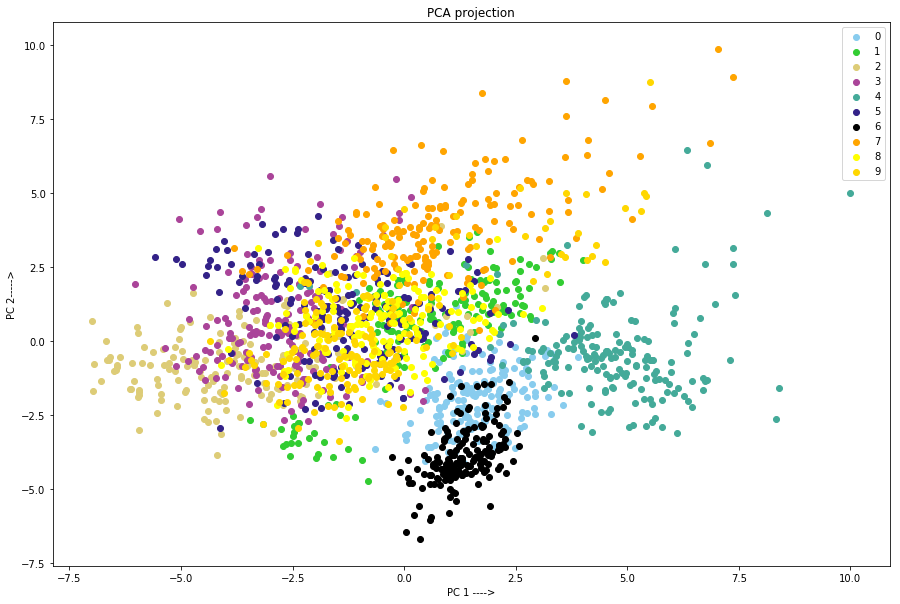

In [5]:
#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
cmap_10=['#88CCEE', 'limegreen', '#DDCC77','#AA4499','#44AA99','#332288','k','orange','yellow','gold']

#Y_train_labels=np.unique(labels)
def plot_real_data():    
    plt.figure(figsize=(15,10))
    for color_index, color in enumerate(cmap_10): #enumerating cmap_10 list to use the index
        data = reduced_data[labels == color_index]    #selects reduced_data rows where corresponding labels is color_index
        plt.scatter(data[:, 0], data[:, 1], color=color,
                        label=color_index)

    plt.title("PCA projection")
    plt.xlabel("PC 1 ---->")
    plt.ylabel("PC 2----->")
    plt.legend(loc=0)
    
plot_real_data()

In [6]:
#reduced_data




cov_type=['full','spherical','diag','tied']
bic_df=pd.DataFrame(columns=cov_type,index=[x for x in range(1,11)]) #maintaining a dataframe object to plot bar graphs


aic_df=pd.DataFrame(columns=cov_type,index=[x for x in range(1,11)]) #maintaining a dataframe object to plot bar graphs


for i in range(1,11):
  
    for j in cov_type:
    
        gmm = mixture.GaussianMixture(n_components=i,
                                      covariance_type=j, random_state=123)
        gmm.fit(reduced_data,labels)
        
        
        
        bic_df.loc[i,j]=gmm.bic(reduced_data)
        aic_df.loc[i,j]=gmm.aic(reduced_data)
        
        



In [7]:
bic_df

,full,spherical,diag,tied
1,16987.8,16996.6,16980.3,16987.8
2,16828.1,16939.1,16898.9,16758.4
3,16689.3,16854.5,16865.4,16749.8
4,16435.9,16591.9,16595.9,16778.6
5,16451.4,16542.9,16480.2,16713.8
6,16486.1,16571.8,16512.1,16691.1
7,16524.2,16574.5,16530.5,16699.6
8,16544.8,16607.1,16548.5,16694.8
9,16566.8,16552.1,16547.5,16614.3
10,16571,16524.2,16555.4,16626.9


In [8]:
bic_df.min(axis=1)

1     16980.337041
2     16758.371802
3     16689.334384
4     16435.910105
5     16451.353418
6     16486.089263
7     16524.183512
8     16544.826183
9     16547.531515
10    16524.186531
dtype: float64

In [9]:
min_cov=bic_df.min(axis=1).values.tolist() #taking min along axis=1 in bic_df DataFrame and converting to a list object
best_k=min_cov.index(min(min_cov))+1    #finding the index of the list which is minimum=min_cov and adding 1 because it should start with 1
print(f"The best k is : {best_k}") 




The best k is : 4


### visualization of BIC scores

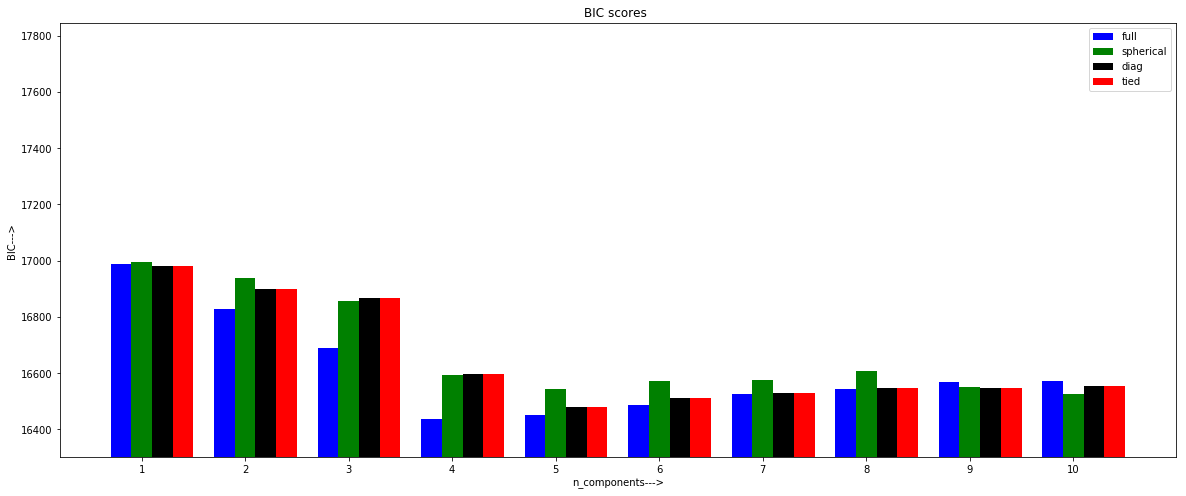

In [10]:
index=np.array([x for x in range(1,11)])
values1=[full for full in bic_df['full']]
values2=[spherical for spherical in bic_df['spherical']]
values3=[diag for diag in bic_df['diag']]
values4=[tied for tied in bic_df['tied']]

bw=0.2
plt.figure(figsize=(20,8))
plt.bar(index,values1,bw,color='b', label='full')

plt.bar(index+bw,values2,bw,color='g',label='spherical')
plt.bar(index+2*bw,values3,bw,color='k',label='diag')
plt.bar(index+3*bw,values3,bw,color='r',label='tied')
plt.xticks(index+bw,['1','2','3','4','5','6','7','8','9','10'])
plt.ylim(bottom=16300)
plt.xlabel('n_components--->')
plt.ylabel('BIC--->')
plt.title("BIC scores ")
plt.legend(loc=0)

### visualization of AIC scores

In [11]:
aic_df

,full,spherical,diag,tied
1,16960.4,16980.1,16958.4,16960.4
2,16767.7,16900.6,16849.5,16714.4
3,16595.9,16794.1,16788.5,16689.4
4,16309.6,16509.5,16491.6,16701.6
5,16292,16438.5,16348.4,16620.4
6,16293.8,16445.4,16352.8,16581.2
7,16298.9,16426.2,16343.8,16573.2
8,16286.6,16436.8,16334.3,16552
9,16275.7,16359.8,16305.8,16454.9
10,16246.9,16309.9,16286.2,16451.1


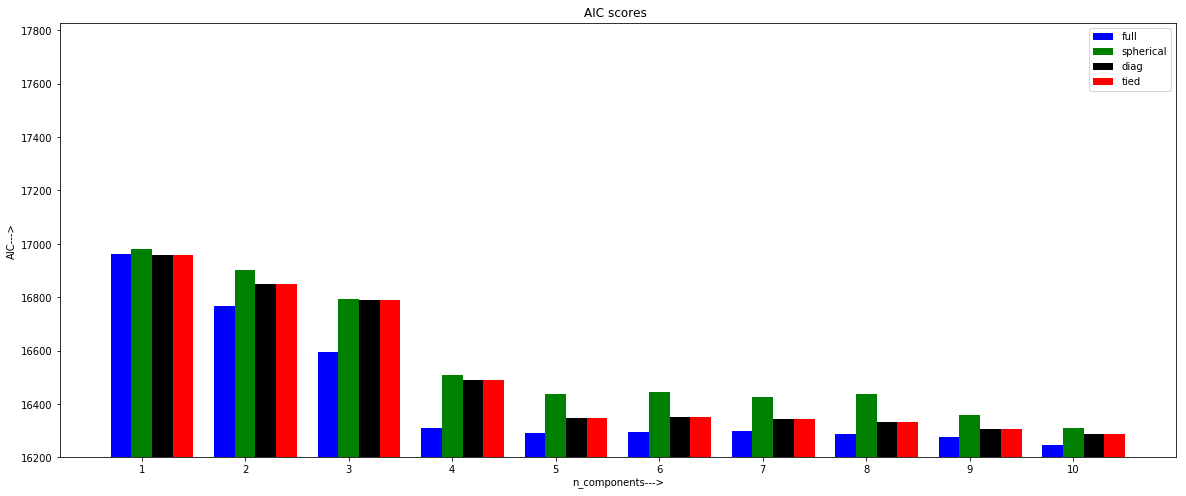

In [12]:
index=np.array([x for x in range(1,11)])
values1=[full for full in aic_df['full']]
values2=[spherical for spherical in aic_df['spherical']]
values3=[diag for diag in aic_df['diag']]
values4=[tied for tied in aic_df['tied']]

bw=0.2
plt.figure(figsize=(20,8))
plt.bar(index,values1,bw,color='b', label='full')

plt.bar(index+bw,values2,bw,color='g',label='spherical')
plt.bar(index+2*bw,values3,bw,color='k',label='diag')
plt.bar(index+3*bw,values3,bw,color='r',label='tied')
plt.xticks(index+bw,['1','2','3','4','5','6','7','8','9','10'])
plt.ylim(bottom=16200)
plt.xlabel('n_components--->')
plt.ylabel('AIC--->')
plt.title("AIC scores ")
plt.legend(loc=0)

### According to BIC score, full and 4 is the optimum

### According to AIC score, full and 10 is the optimum

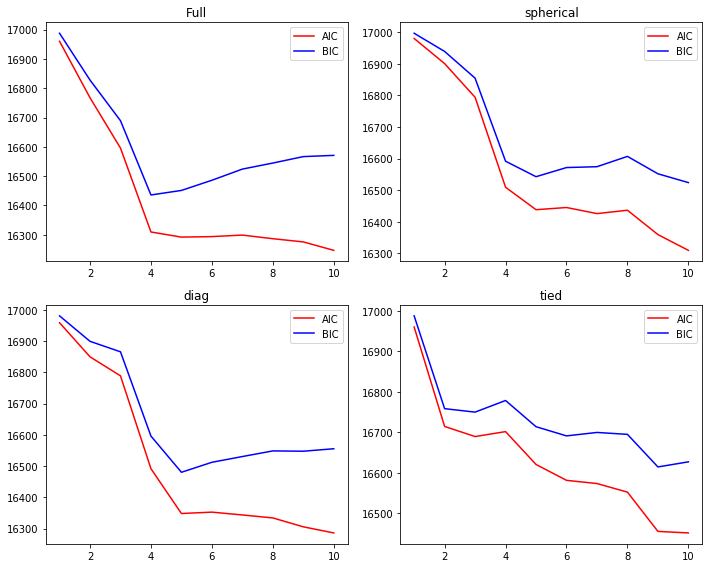

In [13]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
ax[0,0].plot(aic_df['full'],'r', label='AIC')
ax[0,0].plot(bic_df['full'],'b',label='BIC')
ax[0,0].set_title('Full')
ax[0,0].legend(loc=0)

ax[0,1].plot(aic_df['spherical'],'r', label='AIC')
ax[0,1].plot(bic_df['spherical'],'b',label='BIC')
ax[0,1].set_title('spherical')
ax[0,1].legend(loc=0)

ax[1,0].plot(aic_df['diag'],'r', label='AIC')
ax[1,0].plot(bic_df['diag'],'b', label='BIC')
ax[1,0].set_title('diag')
ax[1,0].legend(loc=0)

ax[1,1].plot(aic_df['tied'], 'r',label='AIC')
ax[1,1].plot(bic_df['tied'],'b', label='BIC')
ax[1,1].set_title('tied')

plt.legend(loc=0)
fig.tight_layout()

### If we see covariance type Full, the above plot suggests that the elbow is at cluster K=4 for both AIC and BIC. However, I am going for the lowest AIC score i.e. cluster 10 with Full covariance matrix (according to the bar plot above). This is because I know for sure that there are 10 distinct classes in my digits data.



## BIC: selecting 4 and Full:

### -------------------Visualizing data


In [14]:
#Given in case study
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

In [15]:
from matplotlib.colors import ListedColormap #https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.ListedColormap.html

cmap_10 = ListedColormap(['#88CCEE', 'limegreen', '#DDCC77','#AA4499','#44AA99','#332288','k','orange','yellow','gold'])


(1797, 2)


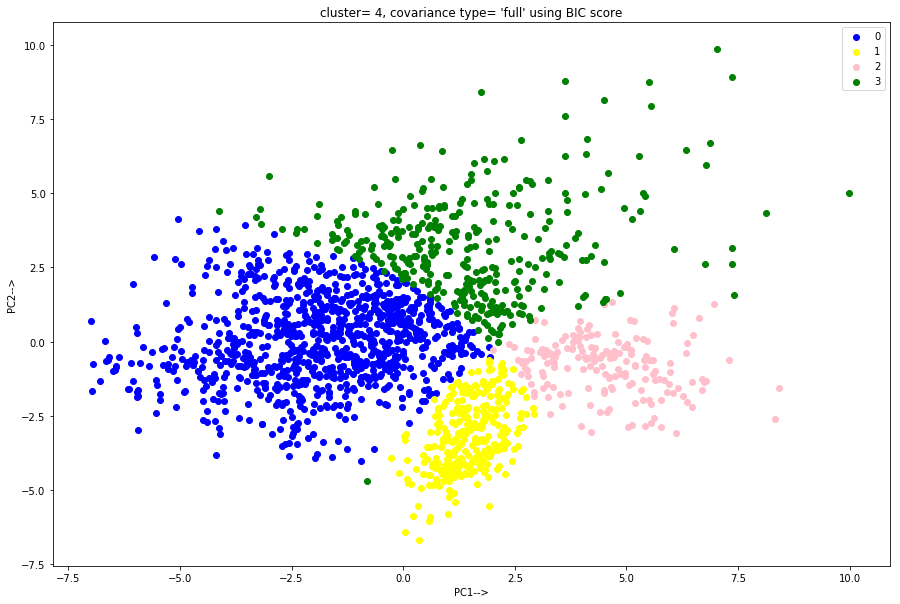

In [16]:
gmm = mixture.GaussianMixture(n_components=4,
                                      covariance_type='full', random_state=123)

gmm.fit(reduced_data,labels)

print(reduced_data.shape)
y_predict_bic=gmm.predict(reduced_data)
  

    


#cmap_4=ListedColormap(['blue','yellow','pink','green'])

cmap_4=['blue','yellow','pink','green']

def plot_bic(): #plotting each cluster one at a time
    
    plt.figure(figsize=(15,10))
    for color_index, color in enumerate(cmap_4):
        data_train = reduced_data[y_predict_bic == color_index] #selects X_train rows where corresponding y_predicted is color_index
        plt.scatter(data_train[:, 0], data_train[:, 1], color=color,label=color_index) #plotting the points corresponding to y_predict=colo_index




    plt.title("cluster= 4, covariance type= 'full' using BIC score")
    plt.xlabel("PC1-->")
    plt.ylabel("PC2-->")
    plt.legend(loc=0)
    
    
    


plot_bic()




## Since cluster is 4, finding which labels got fused together with other labels per cluster:


In [17]:
'''
1) Creating an empty dataframe cluster_df that will contain the reduced_data+labels column+y_predict_cv as cluster column 1797X4
2) count_of_label(label,cluster) will give count of a true label assigned to a particular cluster
3) Sort cluster_df by cluster column
4) Creating cluster_wise_df which will contain the count of true label per cluster
5) Using 2 for loops to achieve this.


'''

#y_predict_bic tells us which labels have been assigned which cluster:

#making DataFrame:
cluster_np=reduced_data.copy() #making a copy 

cluster_df=pd.DataFrame(cluster_np, columns=['PC1','PC2']) #creating a dataframe object
cluster_df['labels']=labels                     #adding the true labels column
cluster_df['clusters']=y_predict_bic           #adding the predicted clusters column


#cluster_df[(cluster_df['labels']==0) &(cluster_df['clusters']==0)].count()['labels']


In [18]:
#this function returns the count of a true label assigned to a particular cluster: 


def count_of_label(label,cluster):
    return cluster_df[(cluster_df['labels']==label) &(cluster_df['clusters']==cluster)].count()['labels']

In [19]:
cluster_df.sort_values(by='clusters',inplace=True) #sorted the entire dataframe by clusters
#cluster_df.head(3)

cluster_wise_df=pd.DataFrame(columns=[0,1,2,3],index=list(range(10)))

print("The empty cluster_wise_df: \n")
print(cluster_wise_df)

for cluster in cluster_wise_df.columns:
    for label in cluster_wise_df.index:
        cluster_wise_df.iloc[label,cluster]=count_of_label(label,cluster)
        
print("\nThe filled cluster_wise_df: \n")
print(cluster_wise_df)
print("\n Column is true label axis \n Row is cluster axis\n")

The empty cluster_wise_df: 

     0    1    2    3
0  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN
6  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN
8  NaN  NaN  NaN  NaN
9  NaN  NaN  NaN  NaN

The filled cluster_wise_df: 

     0    1    2    3
0   26  131   19    2
1  113    0    0   69
2  172    0    0    5
3  165    0    0   18
4    4    1  153   23
5  158    1    2   21
6    0  180    1    0
7   25    0    0  154
8  149    0    0   25
9  147    0    0   33

 Column is true label axis 
 Row is cluster axis



Text(0.5,0,'True labels-->')

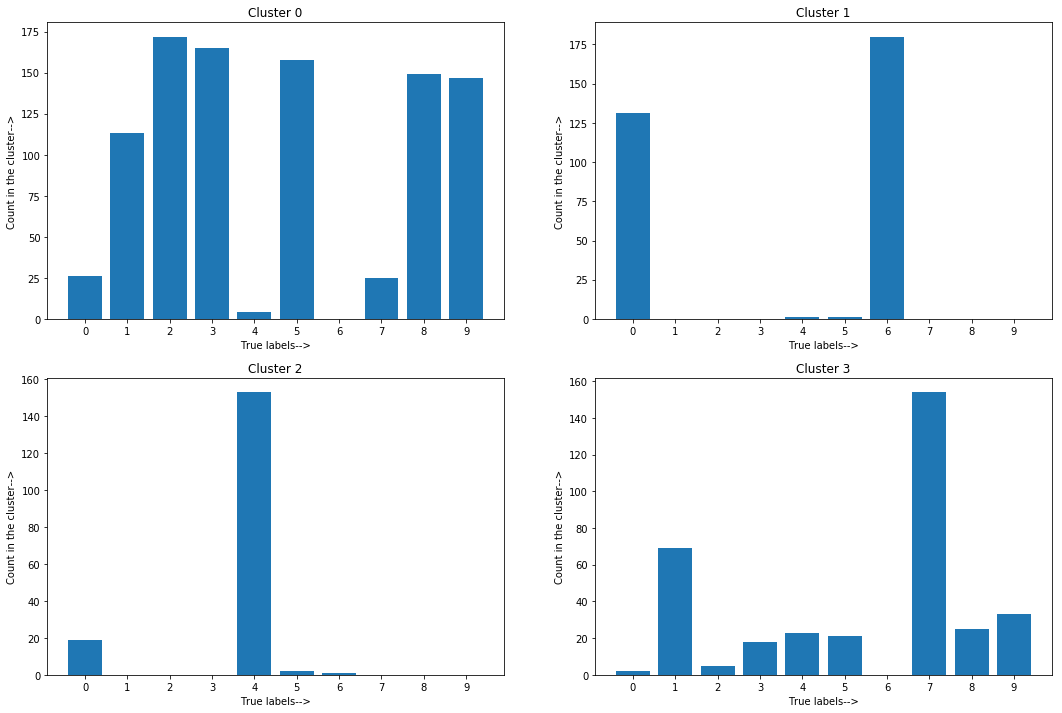

In [20]:

index=list(range(10))

fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(18,12))

#bar plot to show the count of each true label in the cluster 0

ax[0,0].bar(index,cluster_wise_df[0])
ax[0,0].set_xticks(index)
ax[0,0].set_title('Cluster 0')
ax[0,0].set_ylabel('Count in the cluster-->')
ax[0,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 1

ax[0,1].bar(index,cluster_wise_df[1])
ax[0,1].set_xticks(index)
ax[0,1].set_title('Cluster 1')
ax[0,1].set_ylabel('Count in the cluster-->')
ax[0,1].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 2

ax[1,0].bar(index,cluster_wise_df[2])
ax[1,0].set_xticks(index)
ax[1,0].set_title('Cluster 2')
ax[1,0].set_ylabel('Count in the cluster-->')
ax[1,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 3

ax[1,1].bar(index,cluster_wise_df[3])
ax[1,1].set_xticks(index)
ax[1,1].set_title('Cluster 3')
ax[1,1].set_ylabel('Count in the cluster-->')
ax[1,1].set_xlabel('True labels-->')



### Cluster 2 suggests that majority is true label 4, If we compare it with original PCA then we will find majority of 4s in this region.

# Now working on AIC model:


### AIC score selected cluster 10 with 'Full' (in the above cells)

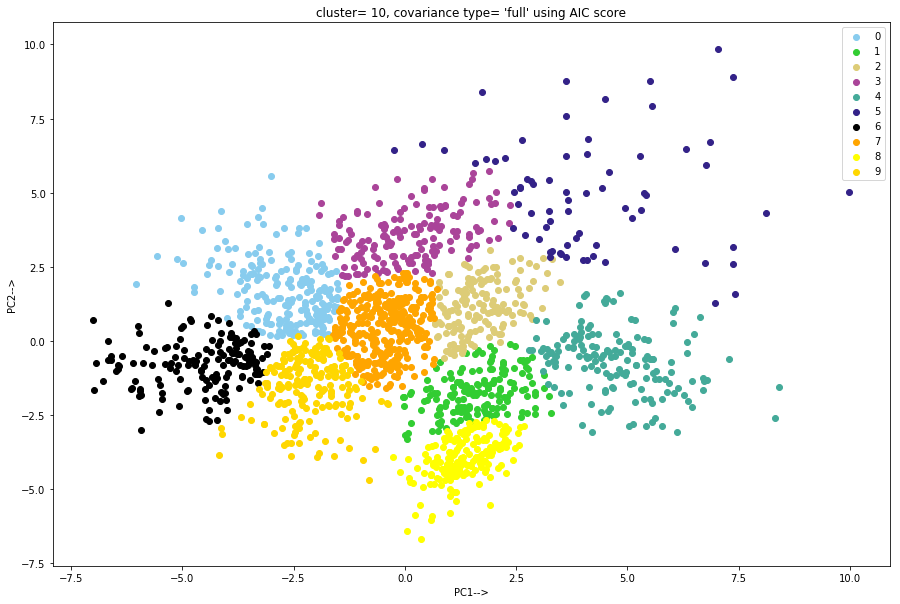

In [21]:
gmm = mixture.GaussianMixture(n_components=10,
                                      covariance_type='full', max_iter=1000,random_state=123)

y_predict_aic=gmm.fit_predict(reduced_data,labels)

cmap_10=['#88CCEE', 'limegreen', '#DDCC77','#AA4499','#44AA99','#332288','k','orange','yellow','gold']
#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py



def plot_aic():    
    plt.figure(figsize=(15,10))
    for color_index, color in enumerate(cmap_10):
        data_train = reduced_data[y_predict_aic == color_index] #selects reduced_data rows where corresponding y_predict_aic is color_index
        plt.scatter(data_train[:, 0], data_train[:, 1], color=color,label=color_index) #plotting the points corresponding to label=colo_index




    plt.title("cluster= 10, covariance type= 'full' using AIC score")
    plt.xlabel("PC1-->")
    plt.ylabel("PC2-->")
    plt.legend(loc=0)   

plot_aic()

## AIC : Checking which True label got split among which clusters:

In [22]:
'''
1) Creating an empty dataframe cluster_df that will contain the reduced_data+labels column+y_predict_cv as cluster column 1797X4
2) count_of_label(label,cluster) will give count of a true label assigned to a particular cluster
3) Sort cluster_df by cluster column
4) Creating cluster_wise_df which will contain the count of true label per cluster
5) Using 2 for loops to achieve this.


'''


#y_predict_aic tells us which labels have been assigned which cluster:

#making DataFrame:
cluster_np=reduced_data.copy() #making a copy 

cluster_df=pd.DataFrame(cluster_np, columns=['PC1','PC2']) #creating a dataframe object
cluster_df['labels']=labels                     #adding the true labels column
cluster_df['clusters']=y_predict_aic           #adding the predicted clusters column


#cluster_df[(cluster_df['labels']==0) &(cluster_df['clusters']==0)].count()['labels']


In [23]:
def count_of_label(label,cluster):
    return cluster_df[(cluster_df['labels']==label) &(cluster_df['clusters']==cluster)].count()['labels']

In [24]:
cluster_df.sort_values(by='clusters',inplace=True) #sorted the entire dataframe by clusters
#cluster_df.head(3)

cluster_wise_df=pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8,9],index=list(range(10)))

print("The empty cluster_wise_df: \n")
print(cluster_wise_df)

#putting the count of each true lable in their correct clusters according to the DataFrame cluster_wise_df
for cluster in cluster_wise_df.columns:
    for label in cluster_wise_df.index:
        cluster_wise_df.iloc[label,cluster]=count_of_label(label,cluster)
        
print("\nThe filled cluster_wise_df: \n")
print(cluster_wise_df)
print("\n Column is true label axis \n Row is cluster axis\n")

The empty cluster_wise_df: 

     0    1    2    3    4    5    6    7    8    9
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

The filled cluster_wise_df: 

    0    1   2    3    4   5    6   7    8   9
0   0  121  11    0    7   0    0   1   35   3
1   0    1  72    3    0   4    0  74    0  28
2  16    0   8    1    0   0  105  12    0  35
3  76    3   0   14    0   0   40  13    0  37
4   2    8   6    0  153  11    0   1    0   0
5  63    9  11   15    1   0    2  62    0  19
6   0   21   0    0    1   0    0   0  

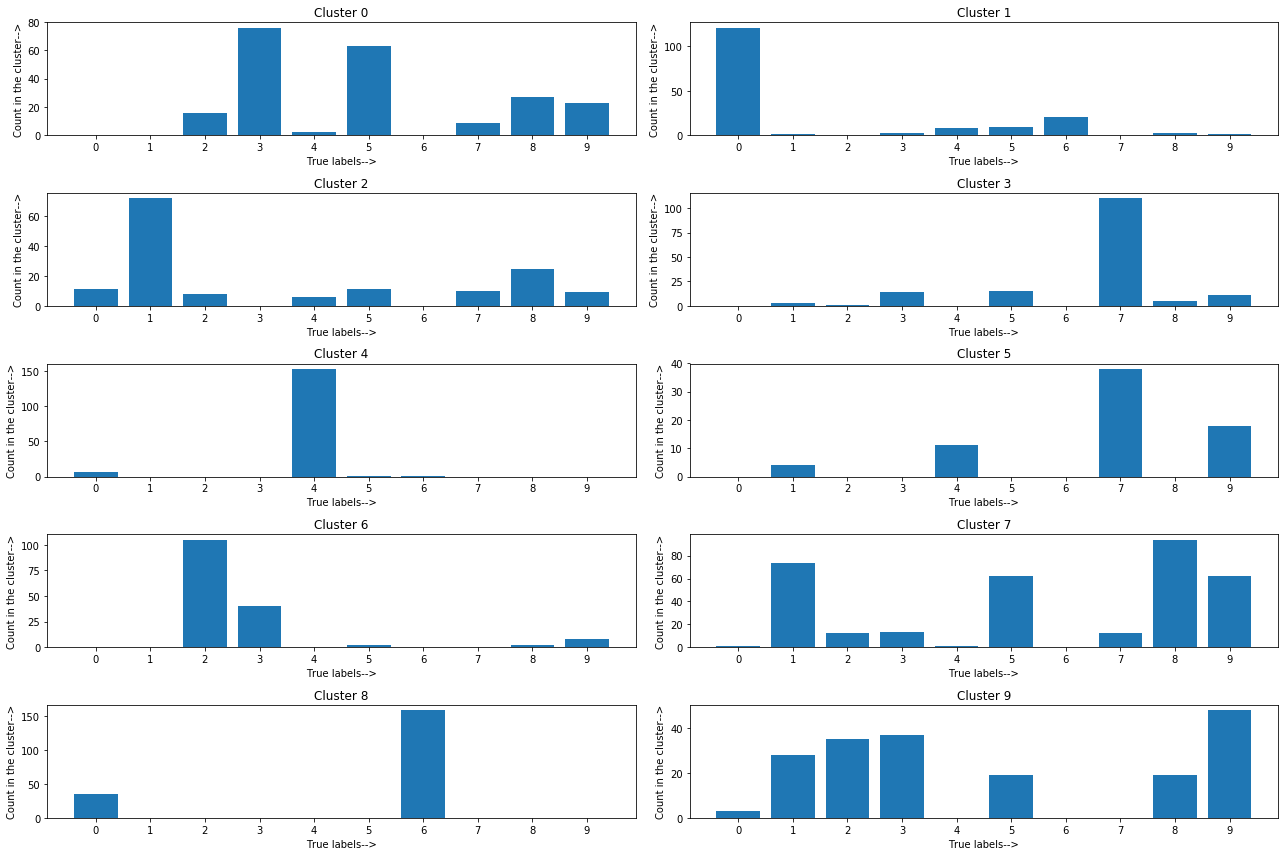

In [25]:

index=list(range(10))

fig,ax=plt.subplots(nrows=5,ncols=2, figsize=(18,12))

#bar plot to show the count of each true label in the cluster 0

ax[0,0].bar(index,cluster_wise_df[0])
ax[0,0].set_xticks(index)
ax[0,0].set_title('Cluster 0')
ax[0,0].set_ylabel('Count in the cluster-->')
ax[0,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 1

ax[0,1].bar(index,cluster_wise_df[1])
ax[0,1].set_xticks(index)
ax[0,1].set_title('Cluster 1')
ax[0,1].set_ylabel('Count in the cluster-->')
ax[0,1].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 2

ax[1,0].bar(index,cluster_wise_df[2])
ax[1,0].set_xticks(index)
ax[1,0].set_title('Cluster 2')
ax[1,0].set_ylabel('Count in the cluster-->')
ax[1,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 3

ax[1,1].bar(index,cluster_wise_df[3])
ax[1,1].set_xticks(index)
ax[1,1].set_title('Cluster 3')
ax[1,1].set_ylabel('Count in the cluster-->')
ax[1,1].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 4

ax[2,0].bar(index,cluster_wise_df[4])
ax[2,0].set_xticks(index)
ax[2,0].set_title('Cluster 4')
ax[2,0].set_ylabel('Count in the cluster-->')
ax[2,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 5

ax[2,1].bar(index,cluster_wise_df[5])
ax[2,1].set_xticks(index)
ax[2,1].set_title('Cluster 5')
ax[2,1].set_ylabel('Count in the cluster-->')
ax[2,1].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 6

ax[3,0].bar(index,cluster_wise_df[6])
ax[3,0].set_xticks(index)
ax[3,0].set_title('Cluster 6')
ax[3,0].set_ylabel('Count in the cluster-->')
ax[3,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 7

ax[3,1].bar(index,cluster_wise_df[7])
ax[3,1].set_xticks(index)
ax[3,1].set_title('Cluster 7')
ax[3,1].set_ylabel('Count in the cluster-->')
ax[3,1].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 8

ax[4,0].bar(index,cluster_wise_df[8])
ax[4,0].set_xticks(index)
ax[4,0].set_title('Cluster 8')
ax[4,0].set_ylabel('Count in the cluster-->')
ax[4,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 9

ax[4,1].bar(index,cluster_wise_df[9])
ax[4,1].set_xticks(index)
ax[4,1].set_title('Cluster 9')
ax[4,1].set_ylabel('Count in the cluster-->')
ax[4,1].set_xlabel('True labels-->')

plt.tight_layout()

### Since our AIC score has termed clusters 10 as the best number, we can investigate if it's really able to identify true labels into clusters or not

### for example, according to the bar graph just above, cluster 1 has majority of true label : 0s in it, 

### so first we find out where is our cluster 1 according to AIC model? :

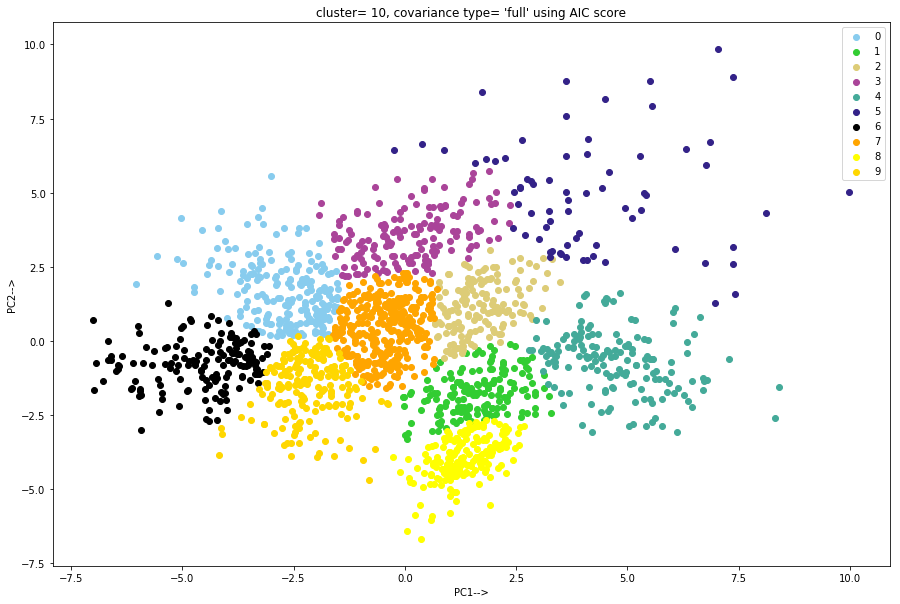

In [26]:
plot_aic()

### our cluster 1 is the green colored cluster

### this means that this zone is where our 0s are

### now lets compare this position with the real PCA projection of our dataset:

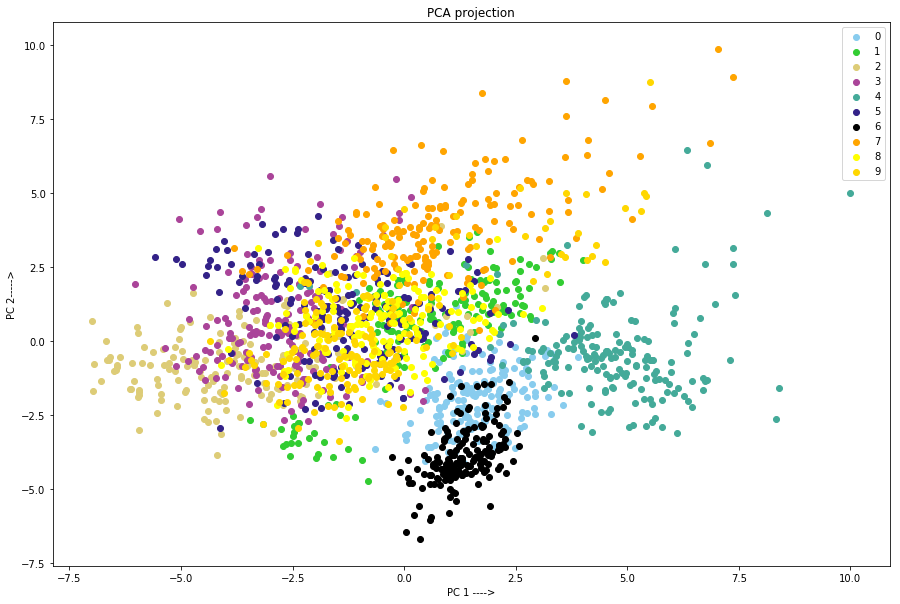

In [27]:
plot_real_data()

### the real PCA shows that "Blue" coloured zone is actually all the 0s which matches with our AIC plot

### similarly we can check for others like true label 4, 7 (7 is split between 4 and 3 clusters)


### Covariance matrix plots using clusters 10 (derived from AIC Score) 

In [28]:



#Given in the case study
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        

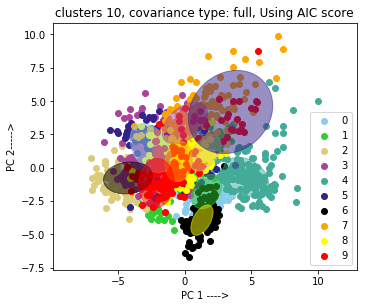

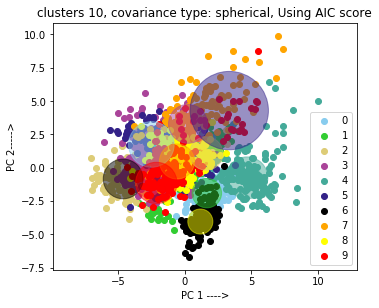

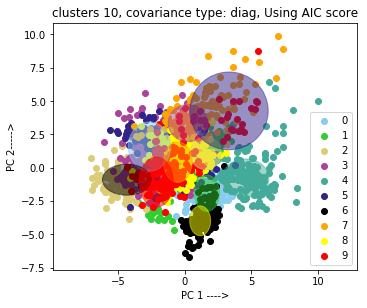

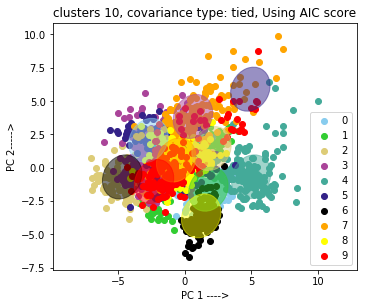

In [29]:
#colors = ['navy', 'turquoise', 'darkorange']
colors=['#88CCEE', 'limegreen', '#DDCC77','#AA4499','#44AA99','#332288','k','orange','yellow','red']

index=1 #it controls which subplot I am working on

#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

#for each covariance matrix, plotting the clusters:
for cov_matrix in ['full','spherical','diag','tied']:
    gmm = mixture.GaussianMixture(n_components=10,
                                      covariance_type=cov_matrix, max_iter=1000,random_state=123)

    y_predict_aic=gmm.fit_predict(reduced_data,labels)
    
    fig = plt.figure(figsize=(12,10))
    #ax = f.add_subplot(121)
    h = fig.add_subplot(2, 2, index) #4 plots
    
    make_ellipses(gmm, h) #this will make the clusters appear
    index+=1   
    
    #plotting the original data
    #https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
    for color_index, color in enumerate(colors): #enumerating colors list to use the index
        data = reduced_data[labels == color_index]    #selects reduced_data rows where corresponding label is color_index
        plt.scatter(data[:, 0], data[:, 1], color=color, #plotting the original data
                        label=color_index)

    plt.title(f"clusters 10, covariance type: {cov_matrix}, Using AIC score")
    plt.xlabel("PC 1 ---->")
    plt.ylabel("PC 2----->")
    plt.legend(loc=0)
    
    

# covariance matrix plot using 4 clusters (derived from BIC):

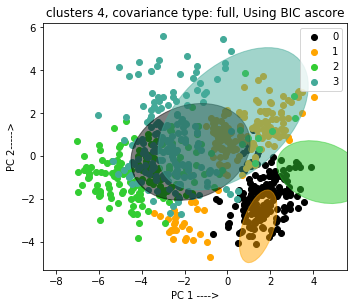

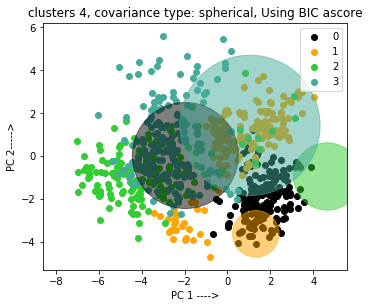

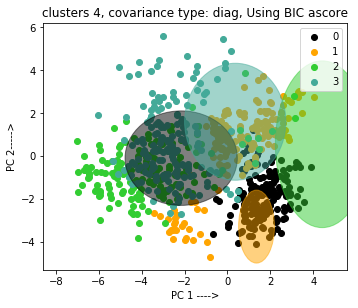

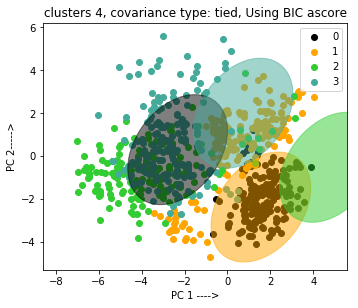

In [30]:
#colors = ['navy', 'turquoise', 'darkorange']
colors=['k','orange','limegreen','#44AA99']
index=1 #it controls which subplot I am working on
#'#88CCEE', 'limegreen', '#DDCC77','#AA4499','#44AA99','#332288'


#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

#for each covariance matrix, plotting the clusters:

for cov_matrix in ['full','spherical','diag','tied']:
    gmm = mixture.GaussianMixture(n_components=4,
                                      covariance_type=cov_matrix, max_iter=1000,random_state=123)

    y_predict_bic=gmm.fit_predict(reduced_data,labels)
    
    fig = plt.figure(figsize=(12,10))
    #ax = f.add_subplot(121)
    h = fig.add_subplot(2, 2, index)
    
    make_ellipses(gmm, h) #this will make the clusters appear
    index+=1
    
    #https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
    #plotting the original data
    for color_index, color in enumerate(colors): #enumerating colours list to use the index
        data = reduced_data[labels == color_index]    #selects reduced_data rows where corresponding label is color_index
        plt.scatter(data[:, 0], data[:, 1], color=color, #plotting the original data
                        label=color_index)

    plt.title(f"clusters 4, covariance type: {cov_matrix}, Using BIC ascore")
    plt.xlabel("PC 1 ---->")
    plt.ylabel("PC 2----->")
    plt.legend(loc=0)
    
    